In [1]:
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/libraries')

from DataLoaders import *
from Visualizations import *

In [2]:
transform = defineDataTransform("train")
train_loader = createDataLoader("data/", transform, 32)

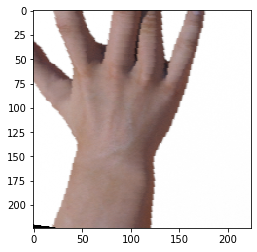

In [46]:
showNumpyAsImg(next(iter(train_loader))[0][0])